In [1]:
import tensorflow as tf
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist #손글씨 이미지 데이터 로드
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

print(x_train.shape,y_train.shape) 
print(x_valid.shape,y_valid.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# 홀 짝을 구분하는 새로운 레이블을 추가하여 모델 구현

y_train_odd = []
for y in y_train:
    if y%2 == 0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)
        
y_train_odd = np.array(y_train_odd)
y_train_odd.shape


(60000,)

In [4]:
print(y_train[:10]) #정답 라벨
print(y_train_odd[:10]) # 홀짝 라벨

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [5]:
# 홀 짝을 구분하는 새로운 레이블을 추가하여 모델 구현
# 검증 셋

y_valid_odd = [] 
for y in y_valid:
    if y%2 == 0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)
        
y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape


(10000,)

In [6]:
x_train = x_train /255.0
x_valid = x_valid /255.0

x_train_in = tf.expand_dims(x_train,-1)
x_valid_in = tf.expand_dims(x_valid,-1)

print(x_train_in.shape,x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
#Functional API를 이용한 모델 생성

# 입력 레이어
inputs = tf.keras.layers.Input(shape=(28,28,1))

# 숫자 판독을 진행하는 레이어들
conv =  tf.keras.layers.Conv2D(32,(3,3),activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)
#

# 홀짝 판별을하는 레이어
flat_inputs = tf.keras.layers.Flatten()(inputs)
#

# 숫자 판독과 홀짝을 입력으로 받아서 합성시키고 출력하는 레이어들
concat = tf.keras.layers.Concatenate()([flat,flat_inputs])
outputs = tf.keras.layers.Dense(10,activation='softmax')(concat)
#

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 13, 13, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 5408)         0           max_pooling2d[0][0]              
_______________________________________________________________________________________

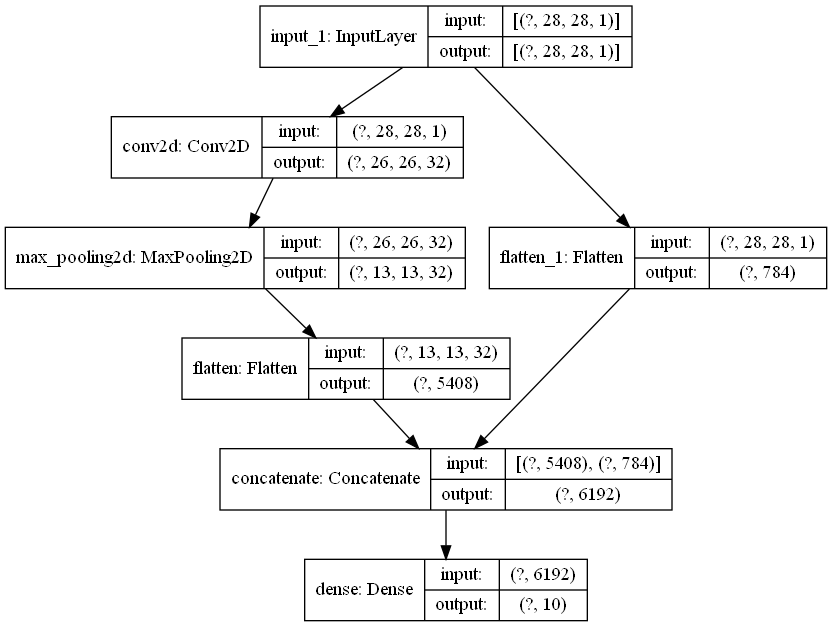

In [8]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,to_file='functional_cnn.png')

In [9]:
# 모델 컴파일

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in,y_train,validation_data=(x_valid_in,y_valid),epochs= 10)
# 입력 x_train_in,y_train, 검증 x_valid_in,y_valid, epochs 10)

# 모델 성능 출력

val_loss , val_acc = model.evaluate(x_valid_in ,y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2054 - accuracy: 0.9414 - val_loss: 0.0876 - val_accuracy: 0.9733
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0778 - accuracy: 0.9771 - val_loss: 0.0674 - val_accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0593 - accuracy: 0.9830 - val_loss: 0.0628 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0492 - accuracy: 0.9847 - val_loss: 0.0537 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.0585 - val_accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0526 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0284 - accuracy: 0.9916 - val_loss: 0.0555 - val_ac

In [10]:
# Functional API를 이용한 모델 생성

#Functional API를 이용한 모델 생성

# 입력 레이어
inputs = tf.keras.layers.Input(shape=(28,28,1),name='inputs')

# 숫자 판독을 진행하는 레이어들
conv =  tf.keras.layers.Conv2D(32,(3,3),activation='relu',name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2),name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)
#

# 홀짝 판별을하는 레이어
flat_inputs = tf.keras.layers.Flatten()(inputs)
#

# 숫자 판독과 홀짝을 입력으로 받아서 합성시키고 출력하는 레이어들
concat = tf.keras.layers.Concatenate()([flat,flat_inputs])
digit_outputs = tf.keras.layers.Dense(10,activation='softmax',name='digit_dense')(concat)
odd_outputs = tf.keras.layers.Dense(1,activation='sigmoid',name='odd_dense')(flat_inputs)
#

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs,odd_outputs])

model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_layer (Conv2D)           (None, 26, 26, 32)   320         inputs[0][0]                     
__________________________________________________________________________________________________
maxpool_layer (MaxPooling2D)    (None, 13, 13, 32)   0           conv2d_layer[0][0]               
__________________________________________________________________________________________________
flatten_layer (Flatten)         (None, 5408)         0           maxpool_layer[0][0]              
_______________________________________________________________________________________

In [11]:
print(model.input)

Tensor("inputs:0", shape=(None, 28, 28, 1), dtype=float32)


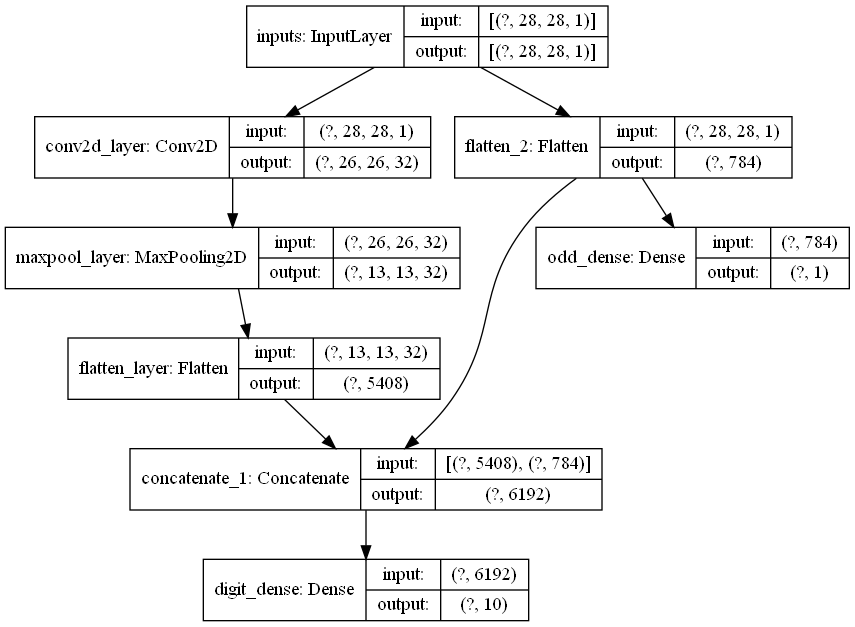

In [12]:
plot_model(model, show_shapes=True,show_layer_names=True,to_file='multi_output_cnn.png')

In [13]:
model.compile(optimizer='adam',loss={'digit_dense':'sparse_categorical_crossentropy','odd_dense':'binary_crossentropy'},
             loss_weights={'digit_dense':1,'odd_dense':0.5},
             # loss = 1.0 * sparse_catogorical_crossentropy + 0.5 * binary_crosentropy
             metrics=['accuracy'])


history = model.fit({'inputs':x_train_in},{'digit_dense':y_train,'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in},{'digit_dense':y_valid,'odd_dense':y_valid_odd}),epochs=10)
              
              
              
                        

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3675 - digit_dense_loss: 0.2049 - odd_dense_loss: 0.3253 - digit_dense_accuracy: 0.9413 - odd_dense_accuracy: 0.8643 - val_loss: 0.2290 - val_digit_dense_loss: 0.0918 - val_odd_dense_loss: 0.2743 - val_digit_dense_accuracy: 0.9731 - val_odd_dense_accuracy: 0.8909
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2152 - digit_dense_loss: 0.0795 - odd_dense_loss: 0.2713 - digit_dense_accuracy: 0.9766 - odd_dense_accuracy: 0.8913 - val_loss: 0.1990 - val_digit_dense_loss: 0.0679 - val_odd_dense_loss: 0.2622 - val_digit_dense_accuracy: 0.9785 - val_odd_dense_accuracy: 0.8965
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1912 - digit_dense_loss: 0.0599 - odd_dense_loss: 0.2626 - digit_dense_accuracy: 0.9818 - odd_dense_accuracy: 0.8964 - val_loss: 0.1884 - val_digit_dense_loss: 0.0590 - val_odd_dense_loss: 0.2587 - val_digit_dense_accuracy: 0.9802 - va

In [14]:
model.evaluate({'inputs':x_valid_in},{'digit_dense':y_valid,'odd_dense':y_valid_odd})

313/313 [==============================] - 1s 2ms/step - loss: 0.1852 - digit_dense_loss: 0.0575 - odd_dense_loss: 0.2555 - digit_dense_accuracy: 0.9822 - odd_dense_accuracy: 0.9017


[0.18522733449935913,
 0.057456158101558685,
 0.2555423974990845,
 0.982200026512146,
 0.9017000198364258]

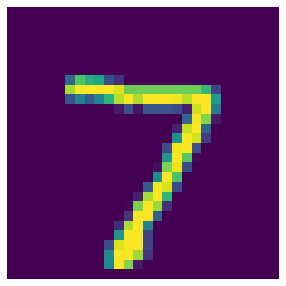

In [15]:
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()
    
plot_image(x_valid, 0)

In [16]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[1.3840196e-12 4.0961637e-11 6.1663052e-09 6.9187234e-07 4.4639990e-12
 1.2825841e-13 1.2259416e-20 9.9999928e-01 8.1254503e-10 8.8447774e-09]
[0.99951214]


In [17]:
digit_labels = np.argmax(digit_preds,axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [18]:
odd_labels=(odd_preds> 0.5).astype(int).reshape(1,-1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [21]:
# 전이 학습 
# 앞서 훈련한 모델의 일부를 가져와서 사용하고 최종 출력층만 새롭게 추가하여 모델 재구성

base_model_output = model.get_layer('flatten_layer').output # model의 flatten_layer까지의 레이어들을 추출

base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base') # -> 모델에 사용
base_model.summary()
model.summary()

Model: "base"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 28

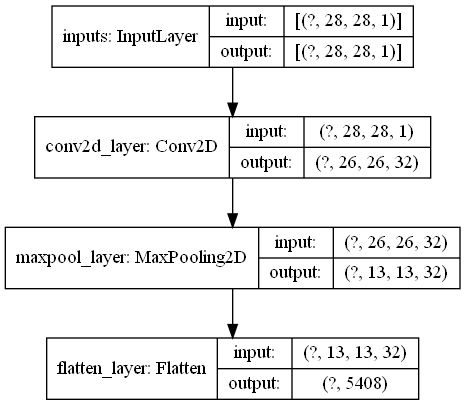

In [22]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [24]:
digit_model = tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax'),
])

digit_model.summary()

# base_model을 하나의 레이어로 추가하고, Dense레이어를 이어서 추가 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
base (Functional)            (None, 5408)              320       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


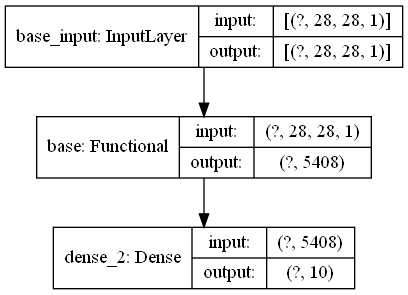

In [25]:
plot_model(digit_model,show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [26]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history= digit_model.fit(x_train_in,y_train,
                        validation_data =(x_valid_in, y_valid),
                         epochs =10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1326 - accuracy: 0.9630 - val_loss: 0.0618 - val_accuracy: 0.9792
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0581 - val_accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0547 - val_accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0548 - val_accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0514 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 0.0564 - val_accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0520 - val_ac

In [27]:
base_model_frozen = tf.keras.models.Model(inputs=model.input,
                                         outputs=base_model_output,
                                         name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

# trainable을 false로 선택해서 가중치를 업데이트 하지 않도록 설정

Model: "base_frozen"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [35]:
dense_output = tf.keras.layers.Dense(10,activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input,
                                          outputs=dense_output)
digit_model_frozen.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_________________________________________________________________


In [36]:
digit_model_frozen.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

history = digit_model_frozen.fit(x_train_in,y_train,
                                validation_data=(x_valid_in,y_valid),
                                epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1180 - accuracy: 0.9681 - val_loss: 0.0547 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0497 - accuracy: 0.9849 - val_loss: 0.0660 - val_accuracy: 0.9786
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0595 - val_accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0499 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0234 - accuracy: 0.9930 - val_loss: 0.0491 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0189 - accuracy: 0.9944 - val_loss: 0.0590 - val_accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0154 - accuracy: 0.9957 - val_loss: 0.0576 - val_accuracy:

In [39]:
## 특정 레이어의 파라미터가 업데이트 되지 않도록 고정하는 방법

base_model_frozen2 = tf.keras.models.Model(inputs=model.input,
                                          outputs = base_model_output,
                                          name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False # 합성곱 레이어 conv2D에만 Trainable = False 설정

base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_layer (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 5408)              0         
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________
